In [758]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [759]:
path = 'camhs_datasets/GraduateEmploymentSurvey.csv'
survey = pd.read_csv(path)

In [863]:
# make all 'na' strings to None
survey = survey.replace("na", None)
# drop all None rows
survey = survey.dropna()
# convert to float
survey['employment_rate_overall'] = survey['employment_rate_overall'].astype('float64')



survey

,year,university,school,degree,employment_rate_overall,employment_rate_ft_perm,basic_monthly_mean,basic_monthly_median,gross_monthly_mean,gross_monthly_median,gross_mthly_25_percentile,gross_mthly_75_percentile
0,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy and Business,97.4,96.1,3701,3200,3727,3350.000,2900,4000
1,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy (3-yr direct Honours Programme),97.1,95.7,2850,2700,2938,2700.000,2700,2900
2,2013,Nanyang Technological University,College of Business (Nanyang Business School),Business (3-yr direct Honours Programme),90.9,85.7,3053,3000,3214,3000.000,2700,3500
3,2013,Nanyang Technological University,College of Business (Nanyang Business School),Business and Computing,87.5,87.5,3557,3400,3615,3400.000,3000,4100
4,2013,Nanyang Technological University,College of Engineering,Aerospace Engineering,95.3,95.3,3494,3500,3536,3500.000,3100,3816
5,2013,Nanyang Technological University,College of Engineering,Bioengineering,81.3,68.8,2952,2900,3166,3125.000,2893,3365
6,2013,Nanyang Technological University,College of Engineering,Chemical and Biomolecular Engineering,87.3,85.1,3235,3000,3377,3200.000,3000,3800
7,2013,Nanyang Technological University,College of Engineering,Computer Engineering,90.3,88.2,3326,3100,3374,3175.000,3000,3600
8,2013,Nanyang Technological University,College of Engineering,Civil Engineering,94.8,93.8,3091,3000,3182,3100.000,3000,3380
9,2013,Nanyang Technological University,College of Engineering,Computer Science,92.1,88.5,3249,3000,3306,3125.000,3000,3600


In [848]:
# which uni has the highest number of employments in 2022?
# get median employment rate for every year
employment = survey.groupby(['year', 'university']).employment_rate_overall.median()
employment_list = []

# 2013/2014/2015/2016/2017/2018/2019/2020/2021/2022
year_select = 2022

employment_2022 = employment.loc[employment.index.get_level_values('year') == year_select]
# print(f'The top hired uni in {year_select} was {employment_2022.idxmax()[1]}. The overall emplyoment rate was {employment_2022.max()}.')
employment_2022 = employment_2022.sort_values(ascending=False).reset_index()

employment_2021 = employment.loc[employment.index.get_level_values('year') == year_select-1]
employment_2021 = employment_2021.sort_values(ascending=False).reset_index()

employment = pd.concat([employment_2022, employment_2021])
employment
# merge both df together

,year,university,employment_rate_overall
0,2022,Singapore Management University,95.55
1,2022,National University of Singapore,94.70
2,2022,Nanyang Technological University,94.00
3,2022,Singapore University of Social Sciences,93.40
4,2022,Singapore Institute of Technology,91.80
0,2021,Singapore Institute of Technology,97.50
1,2021,Singapore Management University,97.15
2,2021,National University of Singapore,96.05
3,2021,Singapore University of Social Sciences,94.10
4,2021,Nanyang Technological University,93.90


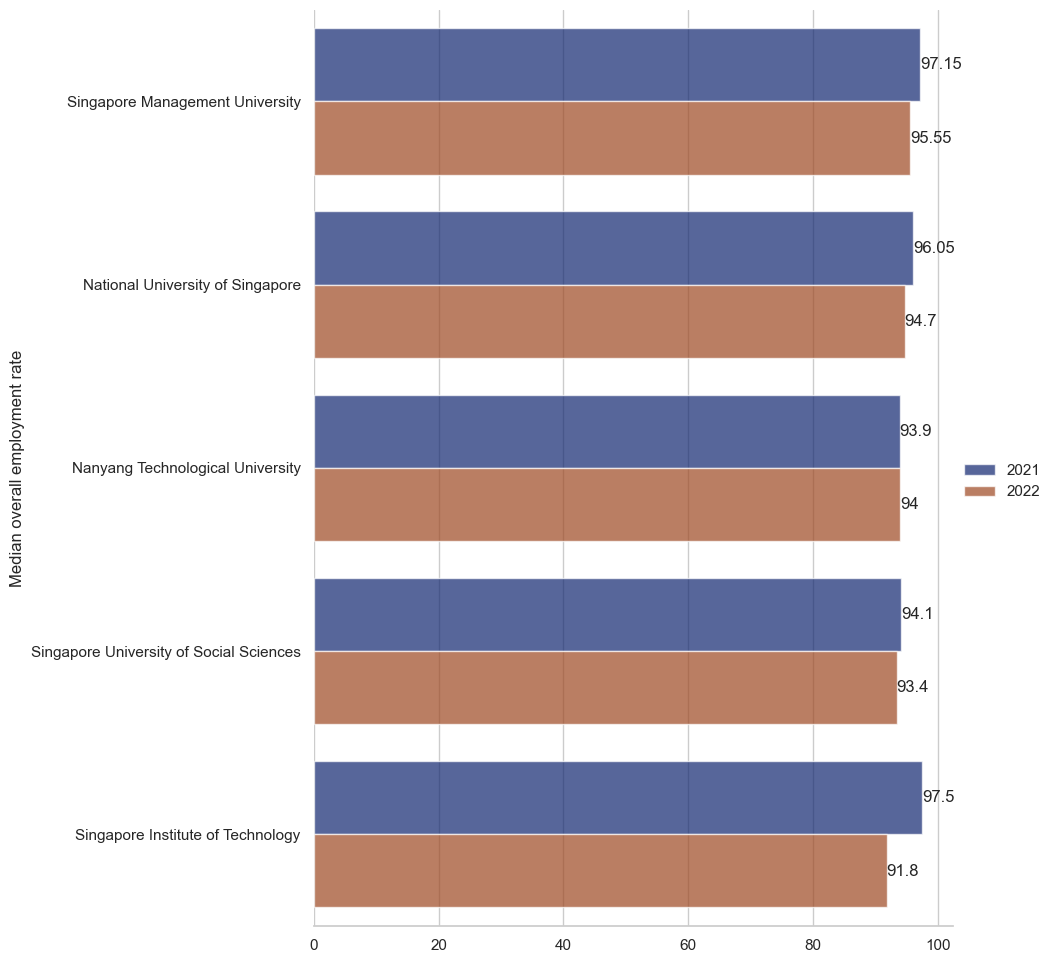

In [849]:
sns.set_theme(style="whitegrid")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=employment, kind="bar",
    x="employment_rate_overall", y="university", hue="year",
    errorbar="sd", palette="dark", alpha=.7, height=10
)
g.despine(left=True)
g.set_axis_labels("", "Median overall employment rate")
g.legend.set_title("")

# iterate through axes
for ax in g.axes.ravel():
    
    # add annotations
    for c in ax.containers:
        # add custom labels with the labels=labels parameter if needed
        # labels = [f'{h}' if (h := v.get_height()) > 0 else '' for v in c]
        ax.bar_label(c, label_type='edge')

# plt.savefig("employment_rate_2021v2022.jpg", bbox_inches="tight")

In [850]:
# which year were graduates most hired?
# convert all values to float type
survey.employment_rate_overall = survey.employment_rate_overall.astype('float64')
# get median of employment rate for every year
most_hired = survey.groupby('year').employment_rate_overall.median().reset_index()
most_hired

# WHY GOT PEAK IN 2022?: https://www.straitstimes.com/singapore/more-fresh-university-grads-in-full-time-work-with-higher-pay (WRONG)

,year,employment_rate_overall
0,2013,90.60
1,2014,90.90
2,2015,91.95
3,2016,90.10
4,2017,92.10
5,2018,92.10
6,2019,92.30
7,2020,94.70
8,2021,95.85
9,2022,94.10


Text(0.5, 0, '')

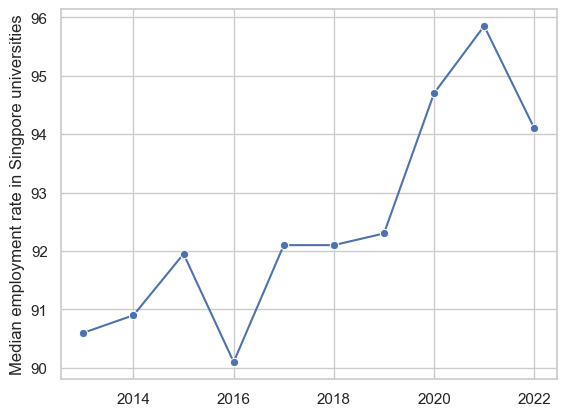

In [851]:
sns.set_theme(style="whitegrid")
sns.lineplot(data=most_hired, x="year", y="employment_rate_overall", marker="o")

plt.ylabel("Median employment rate in Singpore universities")
plt.xlabel("")

# plt.savefig("yearly_employment_rate.jpg", bbox_inches="tight")

In [861]:
pd.set_option('display.max_rows', None)

# which top 5 degrees have the most hired candidates in the past decade?

top_degree = survey.groupby(['university','school','degree']).employment_rate_overall.median()

# omly with rates that are equal to 100
top_degree = top_degree[top_degree == 100].reset_index().drop(['employment_rate_overall'], axis=1)
top_degree.set_index(['university', 'school'])

degree
university                              school                                                                                                                                                                                      
Nanyang Technological University        College of Business (Nanyang Business School)                                             Double Degree in Bachelor of Business (Hons) and Bachelor of Engineering (Hons) (Computer Science)
                                        College of Engineering                                                                                                                          Double Degree in Engineering and Economics ^
                                        College of Science                                                                                                                                    Environmental Earth Systems Sciences ^
                                        College of Sciences                                                                                                                      Biomedical Science (Traditional Chinese Medicine) #
                                        Lee Kong Chian School of Medicine                                                                                                                                                 Medicine #
                                        National Institute of Education (NIE)                                                                                                                                  Arts (With Education)
                                        National Institute of Education (NIE)                                                                                                                                  Arts (with Education)
                                        National Institute of Education (NIE)                                                                                                                    Bachelor of Arts (Hons) (Education)
                                        National Institute of Education (NIE)                                                                                                                 Bachelor of Science (Hons) (Education)
                                        National Institute of Education (NIE)                                                                                                                               Science (With Education)
                                        National Institute of Education (NIE)                                                                                                                               Science (with Education)
                                        National Institute of Education (NIE)                                                                                                                             Science (with Education) ^
                                        National Institute of Education (NIE)                                                                                                                          Sports Science and Management
National University of Singapore        College of Design and Engineering                                                                                                            Bachelor of Engineering (Engineering Science) ^
                                        Faculty Of Dentistry                                                                                                                                              Bachelor of Dental Surgery
                                        Faculty of Dentistry                                                                                                                                              Bachelor of Dental Surgery
                                        Faculty of Science                                          

In [854]:
# which school has the LOWEST basic monthly salary in the past decade?
survey.gross_monthly_median = survey.gross_monthly_median.astype('float64')
salary = survey.groupby(['year','university','school']).gross_monthly_median.median().reset_index()
# only select data for year 2022
salary = salary.loc[salary['year']==year_select]

# categorise based on university, school, degree
salary_indexed = salary.set_index(['university','school'], drop=True)
# salary_indexed

In [855]:
# method to output seaborn bar plot

def plot_bar(school_name, df, color):
    plt.figure(figsize=(10, 5))
    plt.ylabel(f'Schools in {school_name}')
    plt.xlabel(f'Median gross salary per month (SGD) in {year_select}')
    plt.xlim(0, 6000)
    sns.barplot(df, x="gross_monthly_median", y="school", legend=True, color=color, alpha=0.7)
    # plt.savefig("schools_salary.jpg", bbox_inches="tight")

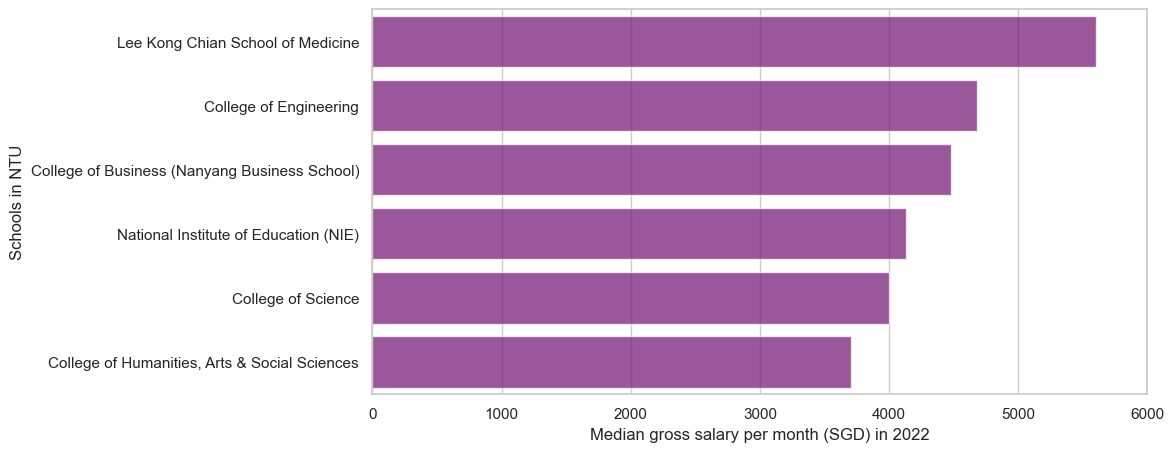

<Figure size 640x480 with 0 Axes>

In [856]:
# NTU median salary for each school
ntu_schools = salary_indexed.loc['Nanyang Technological University'].sort_values(by='gross_monthly_median', ascending=False).reset_index()
plot_bar('NTU', ntu_schools, 'purple')


bar1 = plt.gcf()
plt.show()
plt.draw()
# bar1.savefig("ntu_schools_salary.jpg", bbox_inches="tight")

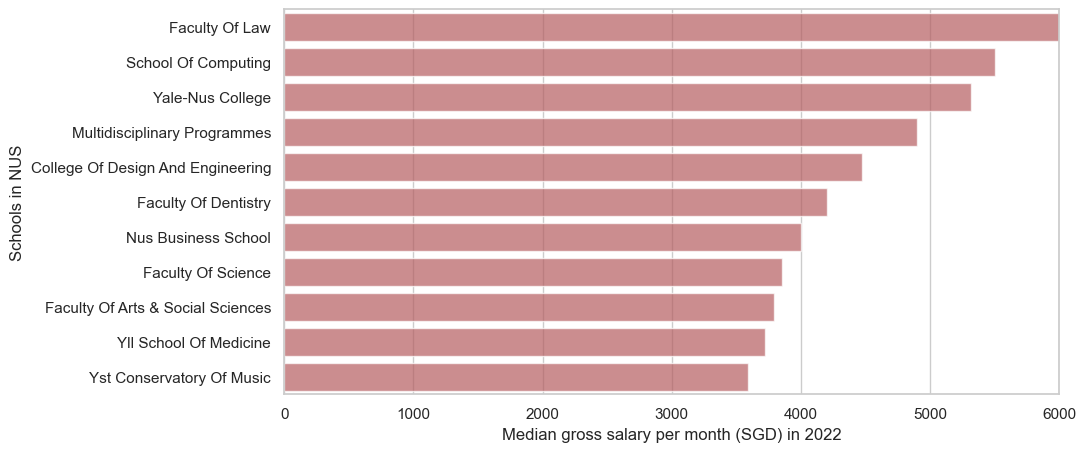

<Figure size 640x480 with 0 Axes>

In [860]:
# NUS median salary for each school
nus_schools = salary_indexed.loc['National University of Singapore'].sort_values(by='gross_monthly_median', ascending=False).reset_index()

# clean data
for h in range(len(nus_schools.school)):
    # make all schools lower cased
    nus_schools.school[h] = nus_schools.school[h].lower()
    # group all similar names together
    if 'multi' in nus_schools.school[h]:
        nus_schools.school[h] = 'multidisciplinary programmes'
    if 'music' in nus_schools.school[h]:
        nus_schools.school[h] = 'YST conservatory of music'
    if 'medicine' in nus_schools.school[h]:
        nus_schools.school[h] = 'YLL school of medicine'
    # make all schools camel cased
    nus_schools.school[h] = nus_schools.school[h].title()

plot_bar('NUS', nus_schools, 'r')

bar1 = plt.gcf()
plt.show()
plt.draw()
# bar1.savefig("nus_schools_salary.jpg", bbox_inches="tight")

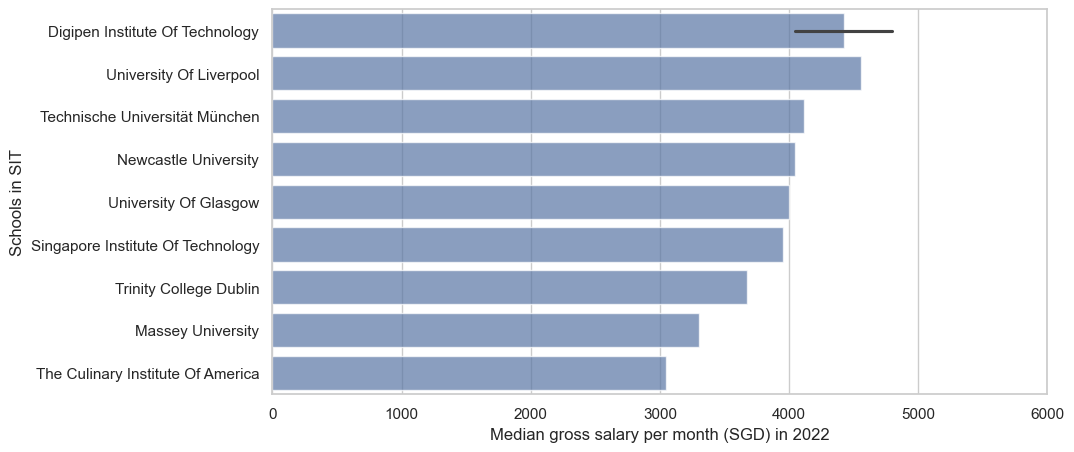

<Figure size 640x480 with 0 Axes>

In [755]:
# SIT median salary for each school
sit_schools = salary_indexed.loc['Singapore Institute of Technology'].sort_values(by='gross_monthly_median', ascending=False).reset_index()

# clean data
for k in range(len(sit_schools.school)):
    # make all schools lower cased
    sit_schools.school[k] = sit_schools.school[k].lower()
    # group all similar names together
    if 'digipen' in sit_schools.school[k]:
        sit_schools.school[k] = 'digipen institute of technology'
    if 'glasgow' in sit_schools.school[k]:
        sit_schools.school[k] = 'university of glasgow'
    if 'newcastle' in sit_schools.school[k]:
        sit_schools.school[k] = 'newcastle university'
    if 'dublin' in sit_schools.school[k]:
        sit_schools.school[k] = 'trinity college dublin'
    if 'massey' in sit_schools.school[k]:
        sit_schools.school[k] = 'massey university'
    if 'singapore' in sit_schools.school[k]:
        sit_schools.school[k] = 'singapore institute of technology'
    # make all schools camel cased
    sit_schools.school[k] = sit_schools.school[k].title()


plot_bar('SIT', sit_schools, 'b')

bar1 = plt.gcf()
plt.show()
plt.draw()
bar1.savefig("sit_schools_salary.jpg", bbox_inches="tight")

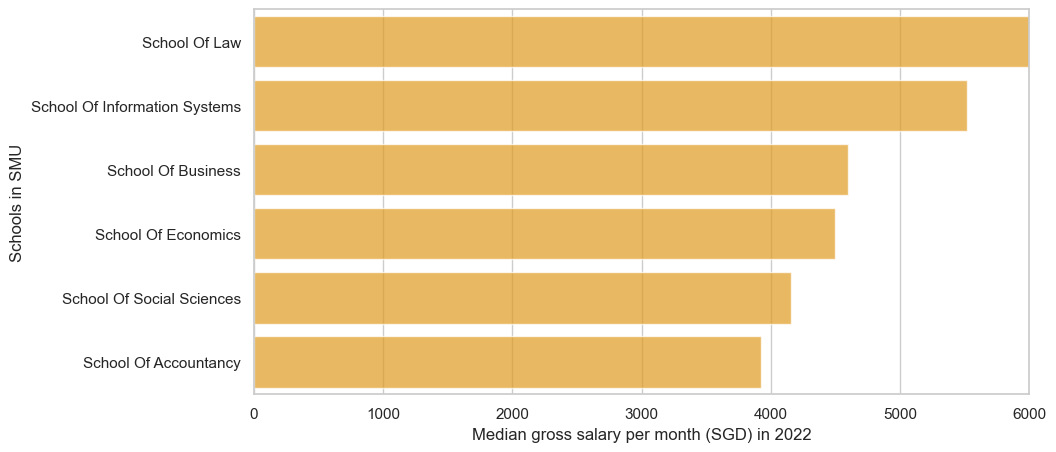

<Figure size 640x480 with 0 Axes>

In [756]:
# SMU median salary for each school
smu_schools = salary_indexed.loc['Singapore Management University'].sort_values(by='gross_monthly_median', ascending=False).reset_index()

# clean data
for l in range(len(smu_schools.school)):
    # make all schools lower cased
    smu_schools.school[l] = smu_schools.school[l].lower()
    # remove unnecessary characters
    smu_schools.school[l] = smu_schools.school[l].replace(' (4-years programme) *', '')
    smu_schools.school[l] = smu_schools.school[l].replace(' (4-year programme) *', '')
    # make all schools camel cased
    smu_schools.school[l] = smu_schools.school[l].title()
    

plot_bar('SMU', smu_schools, 'orange')

bar1 = plt.gcf()
plt.show()
plt.draw()
bar1.savefig("smu_schools_salary.jpg", bbox_inches="tight")

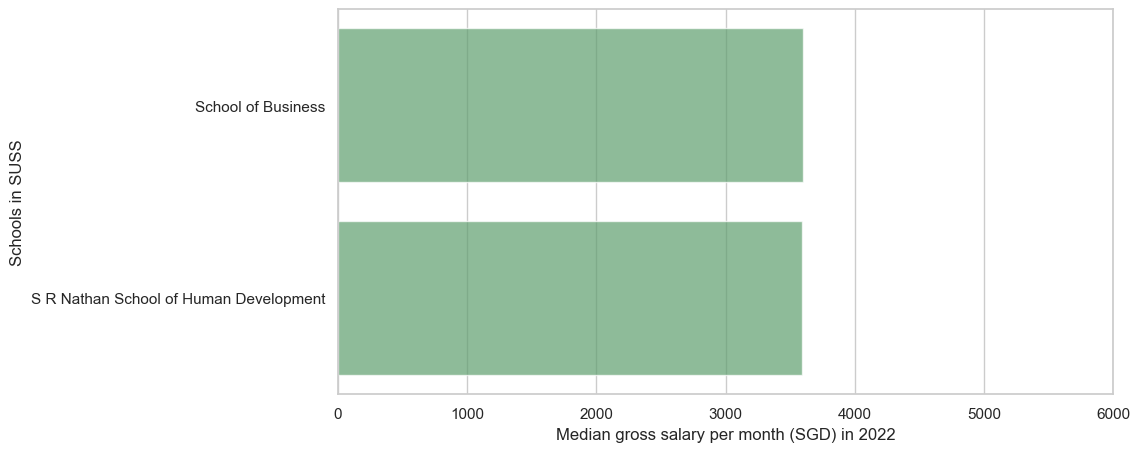

<Figure size 640x480 with 0 Axes>

In [757]:
# SUSS median salary for each school
suss_schools = salary_indexed.loc['Singapore University of Social Sciences'].sort_values(by='gross_monthly_median', ascending=False).reset_index()

plot_bar('SUSS', suss_schools, 'g')

bar1 = plt.gcf()
plt.show()
plt.draw()
bar1.savefig("suss_schools_salary.jpg", bbox_inches="tight")